In [1]:
%autosave 0

Autosave disabled


Imports

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from env import get_connection

Read in the data from codeup's SQL server.

In [3]:
query = '''
        SELECT *
        FROM student_grades
        '''

In [4]:
url = get_connection('school_sample')

In [5]:
df = pd.read_sql(query, url)

In [6]:
# db_url = get_connection('school_sample')

In [7]:
# def get_student_data():
#     filename = "student_grades.csv"

#     if os.path.isfile(filename):

#         return pd.read_csv(filename)
#     else:
#         # Create the url
#         url = get_connection('school_sample')

#         # Read the SQL query into a dataframe
#         df = pd.read_sql('SELECT * FROM student_grades', url)

#         # Write that dataframe to disk for later. Called "caching" the data for later.
#         df.to_csv(filename)

#         # Return the dataframe to the calling code
#         return df

In [8]:
# df = get_student_data()
# df.head()

Summarize our data with some pandas methods.

In [9]:
df.shape

(104, 5)

In [10]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [11]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [13]:
df.isnull().sum()

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

In [14]:
df[df.exam1.isnull()]

,student_id,exam1,exam2,exam3,final_grade
103,10,NaN,70,79,70


Is there anything we need to clean up?
- The null value in exam1
- convert exam3 from object to integer.

In [15]:
df = df.dropna()
df.shape

(103, 5)

In [16]:
df[df.exam3 == ' ']

,student_id,exam1,exam2,exam3,final_grade
10,12,57.0,65,,65


In [17]:
df = df[df.exam3 != ' ']

In [18]:
df.head(11)

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97
5,6,79.0,70,85,81
6,7,92.0,89,94,93
7,8,73.0,70,75,76
8,9,70.0,65,78,77
9,11,58.0,65,70,68


In [19]:
df.exam3 = df.exam3.astype('int')
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3            int64
final_grade      int64
dtype: object

Let's look at the distribution of each feature of our dataset!

In [20]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


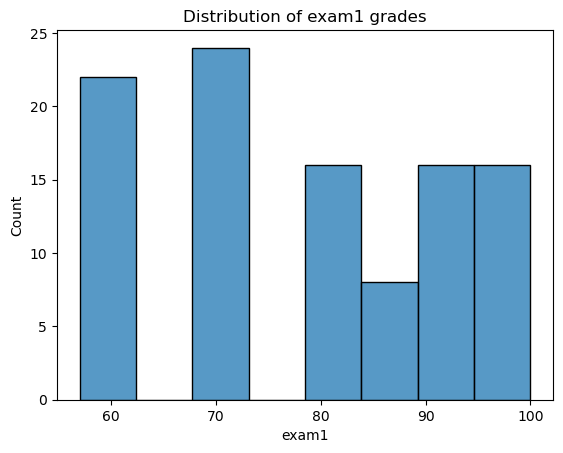

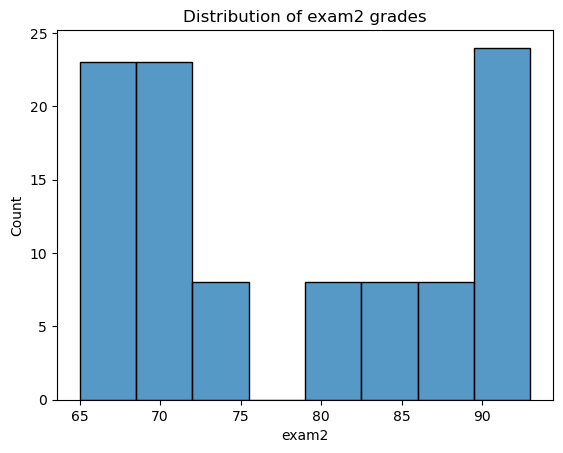

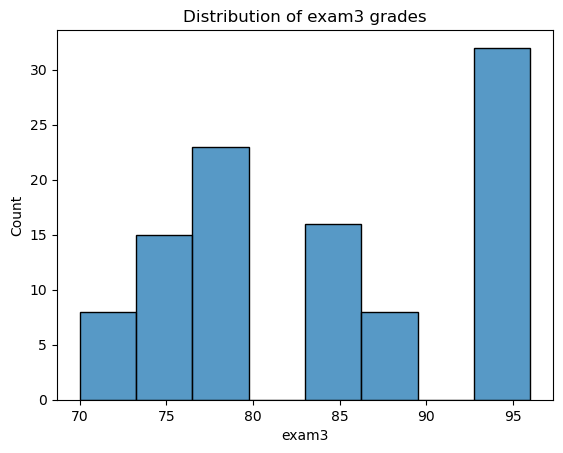

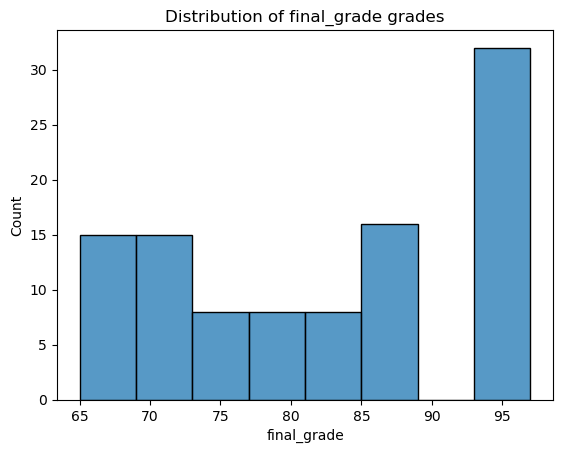

In [21]:
for col in df.drop(columns = ['student_id']).columns:
    plt.figure()    # important to create a blank canvas to plot everything below
    sns.histplot(data = df, x = col)
    plt.title(f'Distribution of {col} grades')
    plt.show()

We could build some sort of pipeline out of this...

In [22]:
def get_grades():
    '''
    Read student_grades into a pandas DataFrame from mySQL,
    drop student_id column, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned student grades DataFrame.
    '''

    # Acquire data

    filename = 'grades.csv'

    if os.path.isfile(filename):
        
        return pd.read_csv(filename)
        
    else: 

        query = '''
                SELECT *
                FROM student_grades
                '''

        url = get_connection('school_sample')
                
        df = pd.read_sql(query, url)

        df.to_csv(filename, index=False)

        return df 

                

    # grades = get_student_data()

    # # Replace white space values with NaN values.
    # grades = grades.replace(r'^\s*$', np.nan, regex=True)

    # # Drop all rows with NaN values.
    # df = grades.dropna()

    # # Convert all columns to int64 data types.
    # df = df.astype('int')

    # return df


In [23]:
def clean_grades():

    df = get_grades()

    df = df.dropna()

    df = df[df.exam3 != ' ']

    df.exam3 = df.exam3.astype('int')
    
    # grades = get_grades()

    #  # Replace white space values with NaN values.
    # grades = grades.replace(r'^\s*$', np.nan, regex=True)

    # # Drop all rows with NaN values.
    # df = grades.dropna()

    # # Convert all columns to int64 data types.
    # df = df.astype('int')

    return df

In [24]:
df = clean_grades()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 102
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    int64  
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.8 KB


In [26]:
df.isna()

,student_id,exam1,exam2,exam3,final_grade
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
98,False,False,False,False,False
99,False,False,False,False,False
100,False,False,False,False,False
101,False,False,False,False,False
